В качестве набора данных я выбрала датасет, демонстрирующий обзоры о качестве продуктов питания на Amazon
https://www.kaggle.com/snap/amazon-fine-food-reviews

Этот набор данных состоит из обзоров качественных продуктов питания от Amazon. Данные охватывают период более 10 лет, включая все ~ 500 000 обзоров до октября 2012 года. Обзоры включают информацию о продукте и пользователе, рейтинги и обзор в виде простого текста. Он также включает в себя отзывы от всех других категорий Amazon.

В моем датасете хранятся следующие данные:
Id
ProductId - уникальный идентификатор продукта
UserId - уникальный идентификатор пользователя
ProfileName - Имя пользователя
HelpfulnessNumerator - число пользователей, которые посчитали этот обзор полезным
HelpfulnessDenominator - число пользователей, оценивших полезность обзора
Score - рейтинг от 1 до 5
Time - дата написания обзора
Summary - краткое содержание обзора
Text - текст обзора


In [20]:
#Импорт библиотек 
import numpy as np
import pandas as pd
import seaborn as sns
#from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [21]:
#Загружаю данные
data = pd.read_csv('Desktop/Reviews.csv', sep=",")

In [22]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
data.shape

(568454, 10)

In [24]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
#data.columns
#data.dtypes
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Всего строк: 568454
Id - 0
ProductId - 0
UserId - 0
ProfileName - 16
HelpfulnessNumerator - 0
HelpfulnessDenominator - 0
Score - 0
Time - 0
Summary - 27
Text - 0


In [25]:
#Различные метрики по моим данным
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [26]:
#Типы данных значений датасета
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [27]:
#Корреляции относительно целевого признака
data.corr()['Score'].abs().sort_values(ascending=False)

Score                     1.000000
HelpfulnessDenominator    0.097986
Time                      0.062760
HelpfulnessNumerator      0.032590
Id                        0.010706
Name: Score, dtype: float64

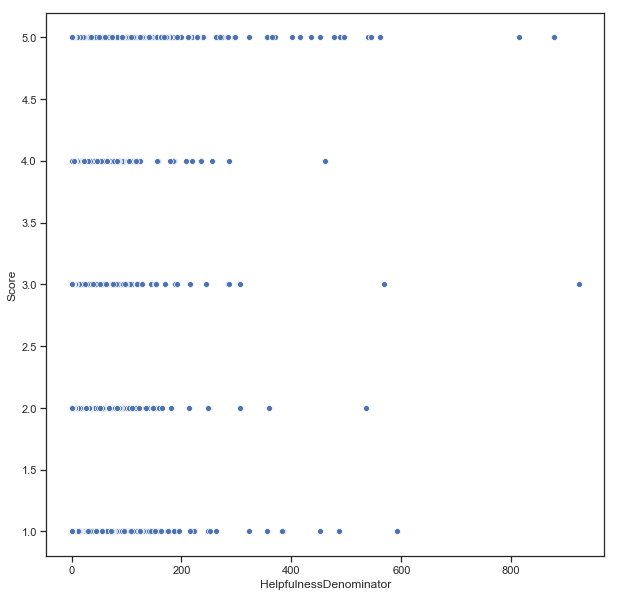

In [28]:
#График рассеивания рейтинга от количества оценок
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='HelpfulnessDenominator', y='Score', data=data)

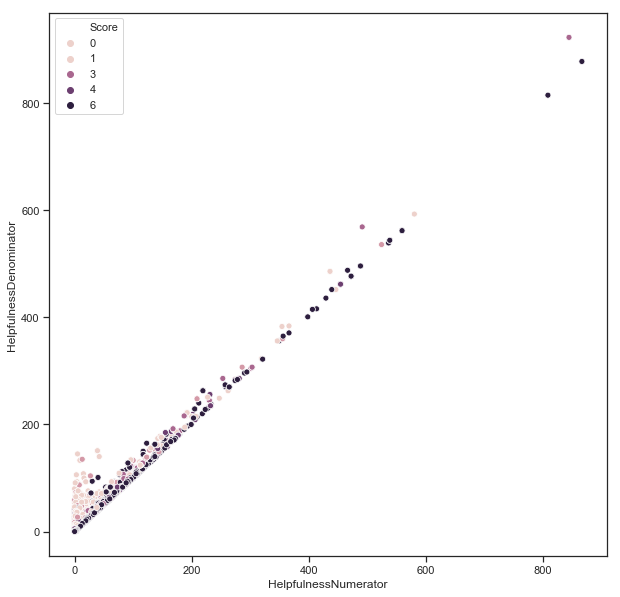

In [29]:
#Все оценки и положительные оценки + окраска по рейтингу
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='HelpfulnessNumerator', y='HelpfulnessDenominator', data=data, hue='Score')

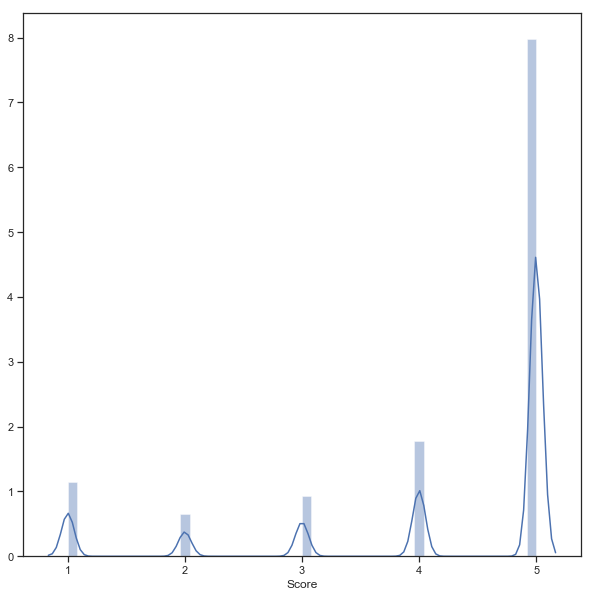

In [30]:
#Гистограмма распределения целевого признака
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Score'])

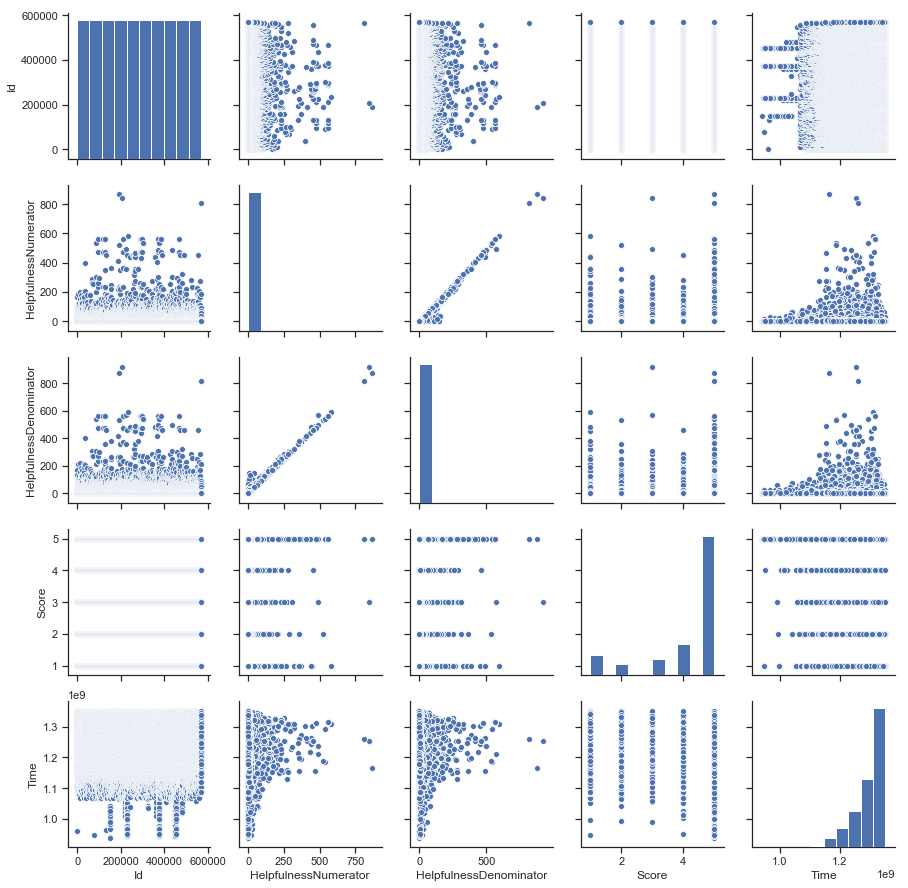

In [31]:
#Графики рассеивания для всех признаков
sns.pairplot(data)

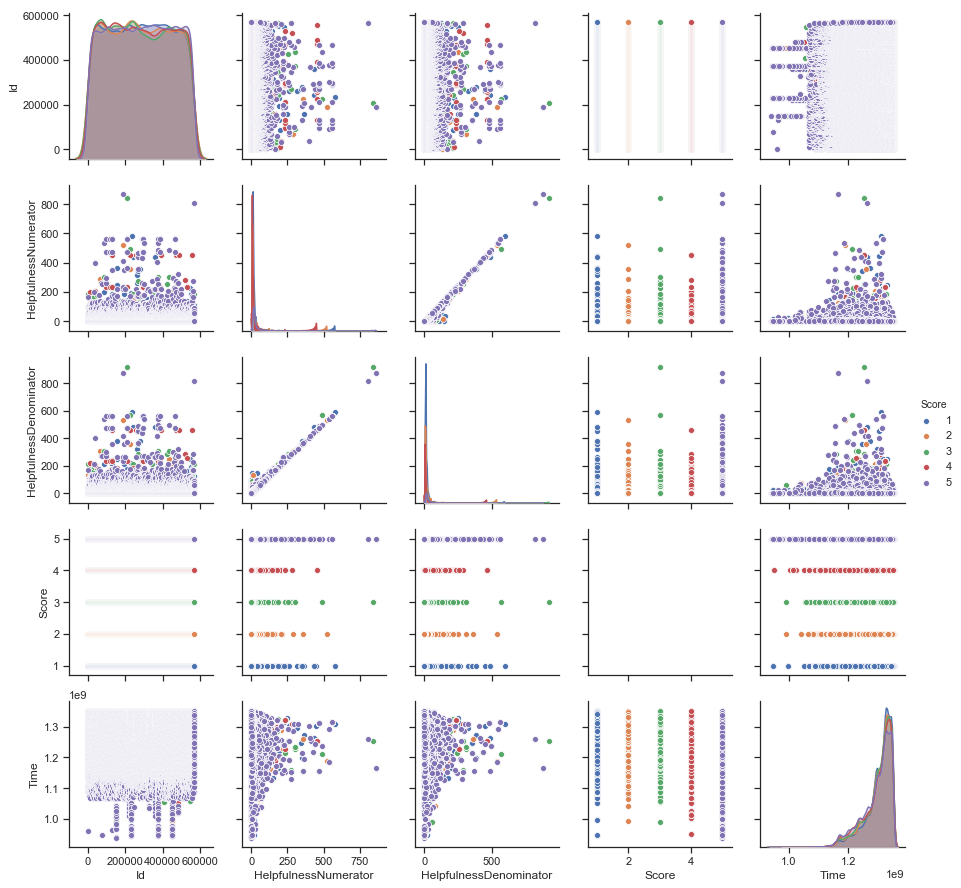

In [32]:
sns.pairplot(data, hue="Score")

In [33]:
#Корреляция всех признаков друг относительно друга
data.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.001227,0.000770,0.010706,0.007912
HelpfulnessNumerator,0.001227,1.000000,0.974689,-0.032590,-0.154818
HelpfulnessDenominator,0.000770,0.974689,1.000000,-0.097986,-0.173289
Score,0.010706,-0.032590,-0.097986,1.000000,-0.062760
Time,0.007912,-0.154818,-0.173289,-0.062760,1.000000


In [34]:
#Корреляция по Пирсону
data.corr(method='pearson')

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.001227,0.000770,0.010706,0.007912
HelpfulnessNumerator,0.001227,1.000000,0.974689,-0.032590,-0.154818
HelpfulnessDenominator,0.000770,0.974689,1.000000,-0.097986,-0.173289
Score,0.010706,-0.032590,-0.097986,1.000000,-0.062760
Time,0.007912,-0.154818,-0.173289,-0.062760,1.000000


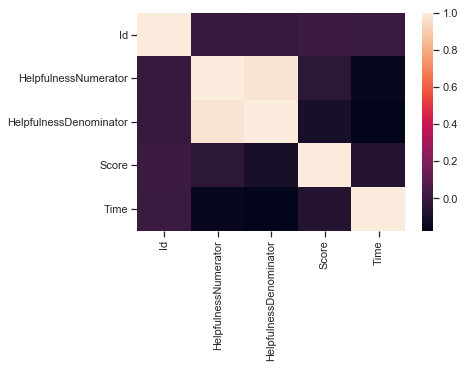

In [35]:
#Тепловая карта для корреляции
sns.heatmap(data.corr())

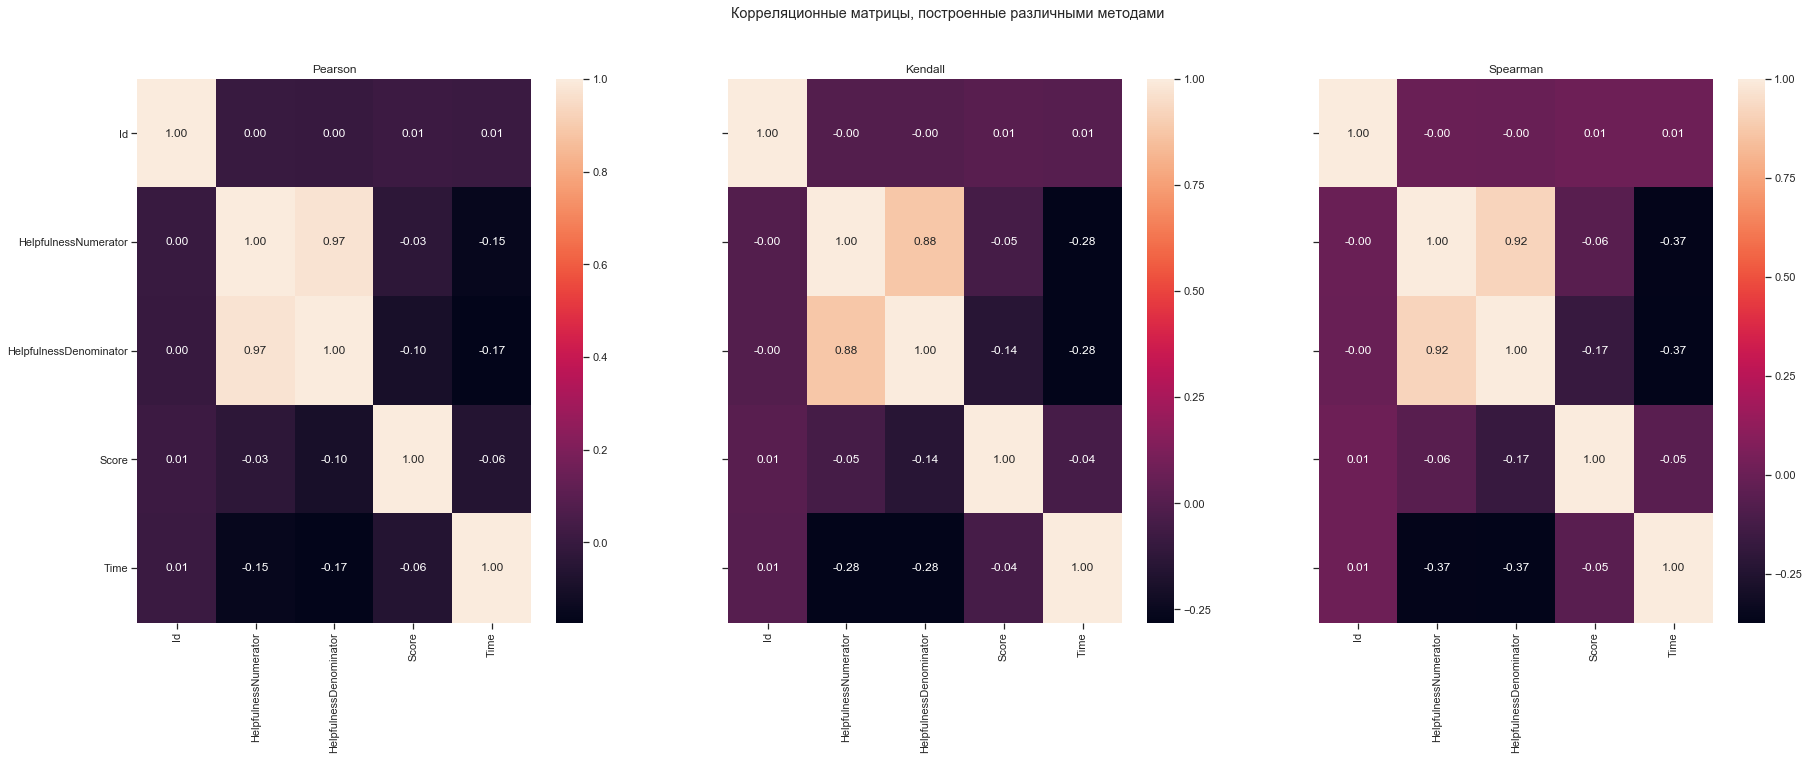

In [36]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(30,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

In [19]:
#Чтобы построить графики потребовалось установить именно эту версию seaborn
!pip3 install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 899kB/s ta 0:00:01
    100% |████████████████████████████████| 27.7MB 50kB/s eta 0:00:011
    100% |████████████████████████████████| 14.4MB 99kB/s eta 0:00:011   28% |█████████▏                      | 4.1MB 1.4MB/s eta 0:00:08
    100% |████████████████████████████████| 13.9MB 105kB/s ta 0:00:01   27% |████████▉                       | 3.8MB 1.2MB/s eta 0:00:09
    100% |████████████████████████████████| 16.3MB 86kB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 512kB 1.9MB/s eta 0:00:01
